# Group 3 ML Group Assignment (Papu S, Jacobs R, Munnik S)
## Problem description (Wireless Indoor Localization)

Detecting users in an indoor environment based on Wi-Fi signal strength has a wide domain of applications. This can be used for objectives like locating users in smart home systems, locating criminals in bounded regions, obtaining the count of users on an access point etc.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import warnings; warnings.simplefilter('ignore')
from sklearn.metrics import precision_recall_curve

# Neural Networks
## Set Room

In [28]:
room = 4

### Training

#### Import training dataset

In [29]:
#Import data
train_data = np.matrix(np.loadtxt('group3_train.csv', delimiter=','));
y_value = train_data[:, -1]
#print(y_value)
for i in range(len(y_value)):
    if y_value[i] != room:
        y_value[i] = 0
    elif y_value[i] == room:
        y_value[i] = 1


#Split data into appropriate variables
X_train = np.column_stack((train_data[:,0],train_data[:,1],train_data[:,2],train_data[:,3],train_data[:,4],train_data[:,5],train_data[:,6]))
y_train = train_data[:, 7]

#### Predictor variable X Training Dataset

In [30]:
X_train

matrix([[-59., -57., -56., ..., -49., -91., -86.],
        [-60., -58., -57., ..., -66., -82., -83.],
        [-57., -52., -56., ..., -52., -91., -85.],
        ...,
        [-48., -56., -54., ..., -67., -78., -82.],
        [-49., -54., -50., ..., -60., -85., -88.],
        [-56., -53., -43., ..., -58., -80., -85.]])

#### Response variable y Training Dataset

In [31]:
y_train

matrix([[1.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [1.]])

#### Scale data from zero to one to improve accuracy

In [32]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X_train = min_max_scaler.fit_transform(X_train)
X_train

array([[0.234375  , 0.52      , 0.53125   , ..., 0.73469388, 0.17142857,
        0.34285714],
       [0.21875   , 0.48      , 0.5       , ..., 0.3877551 , 0.42857143,
        0.42857143],
       [0.265625  , 0.72      , 0.53125   , ..., 0.67346939, 0.17142857,
        0.37142857],
       ...,
       [0.40625   , 0.56      , 0.59375   , ..., 0.36734694, 0.54285714,
        0.45714286],
       [0.390625  , 0.64      , 0.71875   , ..., 0.51020408, 0.34285714,
        0.28571429],
       [0.28125   , 0.68      , 0.9375    , ..., 0.55102041, 0.48571429,
        0.37142857]])

### Testing

#### Import testing dataset

In [33]:
#Import the CV dataset as a matrix
cv_data = np.matrix(np.loadtxt('group3_cv.csv', delimiter=','));

y_value = cv_data[:, -1]
#print(y_value)
for i in range(len(y_value)):
    if y_value[i] != room:
        y_value[i] = 0
    elif y_value[i] == room:
        y_value[i] = 1
        
#Split data into X and y variables
X_CV = np.column_stack((cv_data[:,0],cv_data[:,1],cv_data[:,2],cv_data[:,3],cv_data[:,4],cv_data[:,5],cv_data[:,6]))
y_CV = cv_data[:, 7]

#### Predictor variable X Training Dataset

In [34]:
X_CV

matrix([[-17., -74., -60., ..., -73., -71., -80.],
        [-64., -58., -45., ..., -48., -89., -93.],
        [-69., -59., -59., ..., -78., -86., -87.],
        ...,
        [-12., -56., -58., ..., -70., -75., -79.],
        [-46., -59., -55., ..., -69., -74., -84.],
        [-37., -54., -54., ..., -64., -72., -78.]])

#### Response variable y Testing Dataset

In [35]:
y_CV

matrix([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

#### Scale data from zero to one to improve accuracy

In [36]:
X_CV = min_max_scaler.fit_transform(X_CV)
X_CV

array([[0.88888889, 0.        , 0.35483871, ..., 0.29545455, 0.70588235,
        0.52941176],
       [0.14285714, 0.59259259, 0.83870968, ..., 0.86363636, 0.17647059,
        0.14705882],
       [0.06349206, 0.55555556, 0.38709677, ..., 0.18181818, 0.26470588,
        0.32352941],
       ...,
       [0.96825397, 0.66666667, 0.41935484, ..., 0.36363636, 0.58823529,
        0.55882353],
       [0.42857143, 0.55555556, 0.51612903, ..., 0.38636364, 0.61764706,
        0.41176471],
       [0.57142857, 0.74074074, 0.5483871 , ..., 0.5       , 0.67647059,
        0.58823529]])

### Generate neural network with MLPClassifier

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
                      #Number of nodes and hidden layers
model = MLPClassifier(hidden_layer_sizes=(50,100), 
                      #Maximum number of iterations till convergence
                      max_iter=10000,
                      #Used for weight optimization
                      solver='sgd',
                      #Generate random numbers
                      random_state=1,
                      #Step size in updating weights
                      learning_rate_init=.3) 

#Fit the data model to matrix y_train and x_train
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100), learning_rate='constant',
       learning_rate_init=0.3, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Predictor Variable

Generate the predictor variable of the Cross Validation X dataset.

In [39]:
predictor_y = model.predict(X_CV)
print(predictor_y)

[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]


### Confusion Matrix

In binary classification, the count of true negatives is (1,0), false negatives is (0,0), true positives is (1,1) and false positives is (0,1).

- (0,0) Represents the correctly predicted event values
- (1,0) Represents the incorrectly predicted event values
- (0,1) Represents the correctly predicted no-event values
- (1,1) Represents the incorrectly predicted no-event values.

Text(0.5,257.44,'Predicted label')

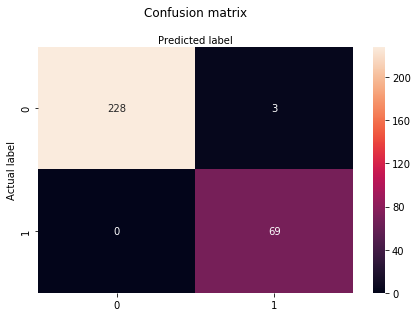

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cnf_matrix = confusion_matrix(y_CV, predictor_y)
class_names=[0,1] # name  of classes
fig, ax = plot.subplots()
tick_marks = np.arange(len(class_names))
plot.xticks(tick_marks, class_names)
plot.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plot.tight_layout()
plot.title('Confusion matrix', y=1.1)
plot.ylabel('Actual label')
plot.xlabel('Predicted label')

### Classification Report

#### Precision
TP - True Positives
FP - False Positives
- Precision = TP/(TP + FP)
- Represents the accuracy of positive predictions

#### Recall Score
FN – False Negatives
- Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified.
- Recall = TP/(TP+FN)

#### F1 Score
- F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
- F1 Score takes into account Precision and the Recall. 
- It is created by finding the the harmonic mean of Precision and Recall.
- F1 = 2 x (Precision x Recall)/(Precision + Recall)


In [41]:
print(classification_report(y_CV, predictor_y))

             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99       231
        1.0       0.96      1.00      0.98        69

avg / total       0.99      0.99      0.99       300



### Model Accuracy

Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
- Accuracy = (TP+TN)/(TP+FP+FN+TN)

In [16]:
print("Accuracy of the model = ", metrics.accuracy_score(y_CV, predictor_y)*100);

Accuracy of the model =  99.0


### Imbalanced Score
Check the imbalance score of the binary classification

In [17]:
print("Cohen kappa score = ", metrics.cohen_kappa_score(y_CV, predictor_y)*100);

Cohen kappa score =  97.21913236929922


As we can see it is not that imbalanced.

### Learning Rate Curves
- Test which learning rates are more accurate
- Test which learning rates are best to reach convergence faster

#### Set the different learning rates to be graphed for convergence.

In [18]:
#Set different learning rates to plot inot a single variable
params = [{'solver': 'sgd', 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate_init': 0.3},
          {'solver': 'sgd', 'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate_init': 0.03},
          {'solver': 'sgd', 'learning_rate_init': 0.003},
          {'solver': 'sgd', 'learning_rate_init': 0.01},
          {'solver': 'sgd', 'learning_rate_init': 0.002}]

#Set different learning rate labels for graphs
labels = ["learning-rate_0.2", "learning-rate_0.3",
          "learning-rate_0.001",
          "learning-rate_-0.03", "learning-rate_0.03",
          "learning-rate_0.001", "learning-rate_-0.002"]

#Set the colour of the lines
plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

#### Plot the Learning Rate Curves

learning-rate_0.2
Accuracy score of 1.000000
learning-rate_0.3
Accuracy score of 1.000000
learning-rate_0.001
Accuracy score of 0.770000
learning-rate_-0.03
Accuracy score of 0.996667
learning-rate_0.03
Accuracy score of 0.770000
learning-rate_0.001
Accuracy score of 0.970000
learning-rate_-0.002
Accuracy score of 0.770000


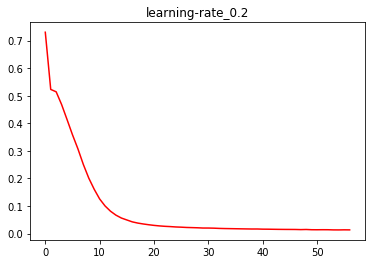

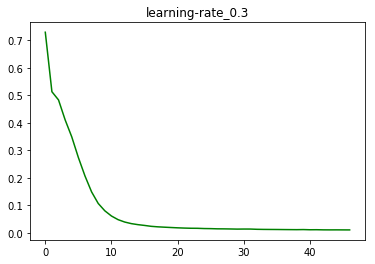

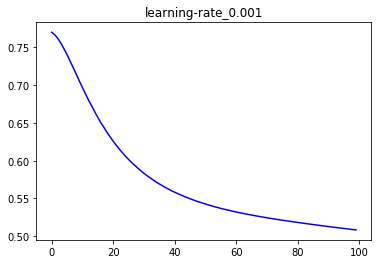

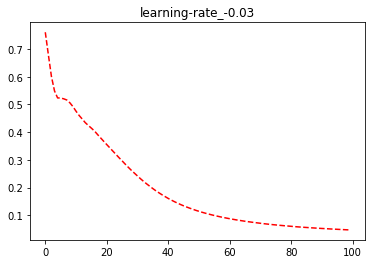

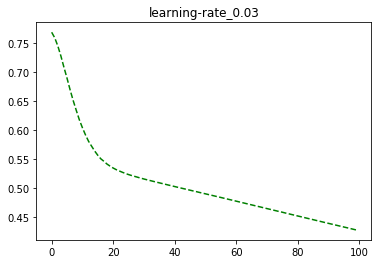

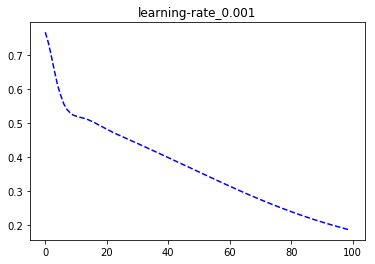

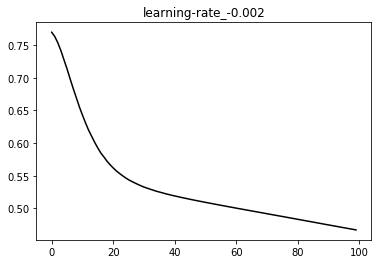

In [19]:
def plot_on_dataset(X, y):
    # for each learning_rate, plot learning for each learning strategy
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    #For 100 iterations till convergence
    max_iter = 100
    for label, param in zip(labels, params):
        print("%s" % label)
        #Fit data and define the classifierwith different parameters
        mlp = MLPClassifier(verbose=0, random_state=0, max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        #Print out the accuracy of each learning rate
        print("Accuracy score of %f" % mlp.score(X, y))
    return mlps
mlps = plot_on_dataset(X_CV, y_CV)
fig = plot.figure()
plot.title("Curves")
i=0
#Plot each parameter with labels and arguments
for mlp, label, args in zip(mlps, labels, plot_args):
            plot.title(labels[i]);
            i=i+1;
            plot.plot(mlp.loss_curve_, label=label, **args)
            plot.show()

## The difference between ROC curves and precision-recall curves
The main difference between ROC curves and precision-recall curves is that the number of true-negative results is not used for making a PRC. 

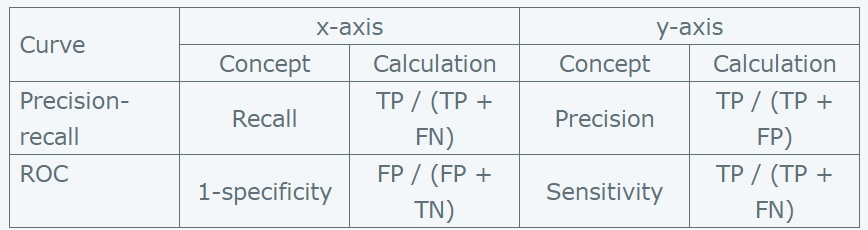

### Plot Precision vs Recall Curve
The cut-off determines the clinical sensitivity (fraction of true positives to all with disease) and specificity (fraction of true negatives to all without disease). 

A precision-recall curve shows the relationship between precision (= positive predictive value) and recall (= sensitivity) for every possible cut-off. The PRC is a graph with: 

• The x-axis showing recall (= sensitivity = TP / (TP + FN)) 
• The y-axis showing precision (= positive predictive value = TP / (TP + FP))

Text(0.5,1,'2-class Precision-Recall curve: AP={0:0.2f}')

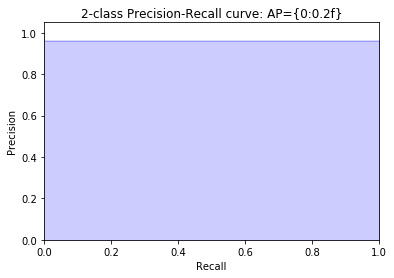

In [20]:
#Get the precision and recall
precision, recall, _ = precision_recall_curve(y_CV, predictor_y)

#Formatting options for the plot
plot.step(recall, precision, color='b', alpha=0.2,where='post')

#Fill the graph with blue
plot.fill_between(recall, precision, step='post', alpha=0.2,color='b')

#Labels
plot.xlabel('Recall')
plot.ylabel('Precision')

#Set limits for x and y
plot.ylim([0.0, 1.05])
plot.xlim([0.0, 1.0])

plot.title('2-class Precision-Recall curve: AP={0:0.2f}')

### ROC Curve
The area under the ROC curve (AUC) is a measure of how well a parameter can distinguish between two diagnostic groups ex. 1/0. Room 4 vs 1,2,3.

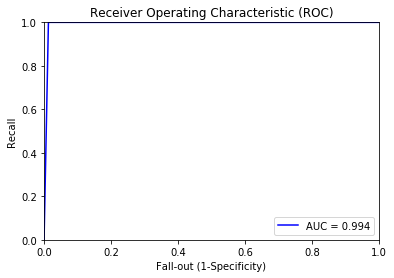

In [21]:
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_CV, predictor_y)
roc_auc = auc(false_positive_rate, recall)
plot.figure()
plot.title('Receiver Operating Characteristic (ROC)')
plot.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plot.legend(loc='lower right')

#Set limiters for X and y
plot.xlim([0.0,1.0])
plot.ylim([0.0,1.0])

#Set labels for X and y
plot.ylabel('Recall')
plot.xlabel('Fall-out (1-Specificity)')
plot.show()